In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import matplotlib
import torchaudio
import torch

In [8]:
def heatmap_spectrogram(ax, spec, vmin=0, vmax=None, title=""):
    y, x = np.meshgrid(np.arange(spec.shape[1]), np.arange(spec.shape[0]))
    z = spec
    ax.pcolormesh(
        x, y, z, cmap="hot", vmin=vmin, vmax=vmax if vmax is not None else 20
    )
#     ax.set_title(title)
    ax.axis([x.min(), x.max(), y.min(), y.max()])

/tmp/ipykernel_38235/2915785442.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(
/tmp/ipykernel_38235/3187163136.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


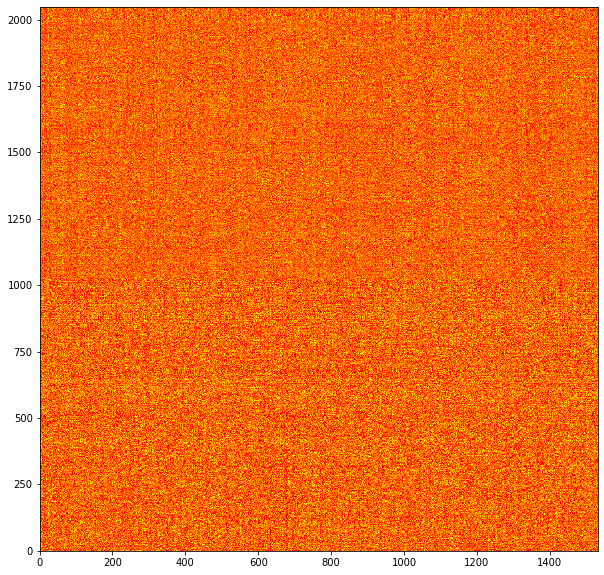

In [18]:
tensor = torch.load("temp.pt").detach()
# tensor = torch.pow(tensor)
# print(tensor)
# print(tensor.max())

fig = plt.figure(figsize=(10, 10))
heatmap_spectrogram(plt, tensor, vmin = tensor.min(), vmax=tensor.max(), title="linear_1 weigth")
fig.show()

/tmp/ipykernel_38235/2915785442.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(
/tmp/ipykernel_38235/1627193216.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


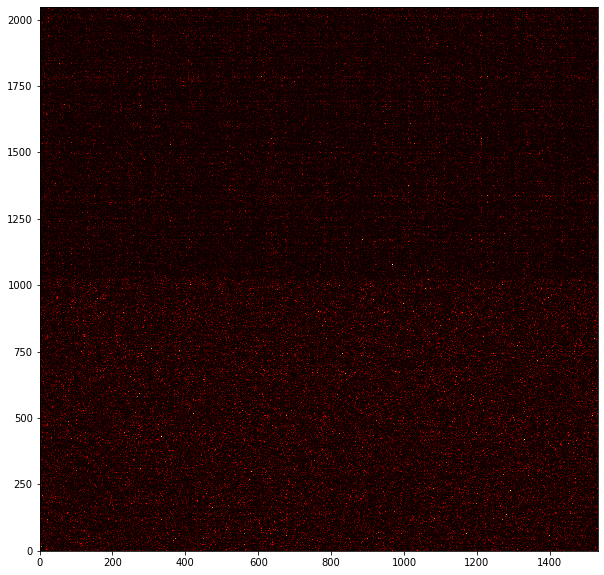

In [26]:
tensor = torch.load("temp.pt").detach()[:, :2048]
tensor = torch.pow(tensor, 2)
# print(tensor)
# print(tensor.max())

fig = plt.figure(figsize=(10, 10))
heatmap_spectrogram(plt, tensor, vmin = tensor.min(), vmax=tensor.max(), title="linear_1 weigth")
fig.show()

In [34]:
PATH_TO_DATASET = "dataset/multilingual_spoken_words/wav"
LANGUAGE = "ru"
CLIPS = "clips_tensors_1"
PATH = f"{PATH_TO_DATASET}/{LANGUAGE}/{CLIPS}"

In [49]:
np.random.seed(seed=29)

labels = os.listdir(PATH)
labels = np.random.choice(labels, 10)

In [50]:
def tensor_sum(a, b):
    return a + b

def tensor_max(a, b):
    return torch.maximum(a, b)

def accum(label, func, shape=(49, 40), initial=None):
    current = torch.zeros(shape).cuda()
    if initial is not None:
        current = initial.cuda()
    for name in os.listdir(f'{PATH}/{label}'):
        tensor = torch.load(f'{PATH}/{label}/{name}')
        current = func(current, tensor)
    return current

In [51]:
tensors = []
for label in tqdm(labels):
    tensors.append(accum(label, tensor_sum) / len(os.listdir(f'{PATH}/{label}')))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 138.39it/s]


/tmp/ipykernel_34708/3113363583.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(
/tmp/ipykernel_34708/545756004.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


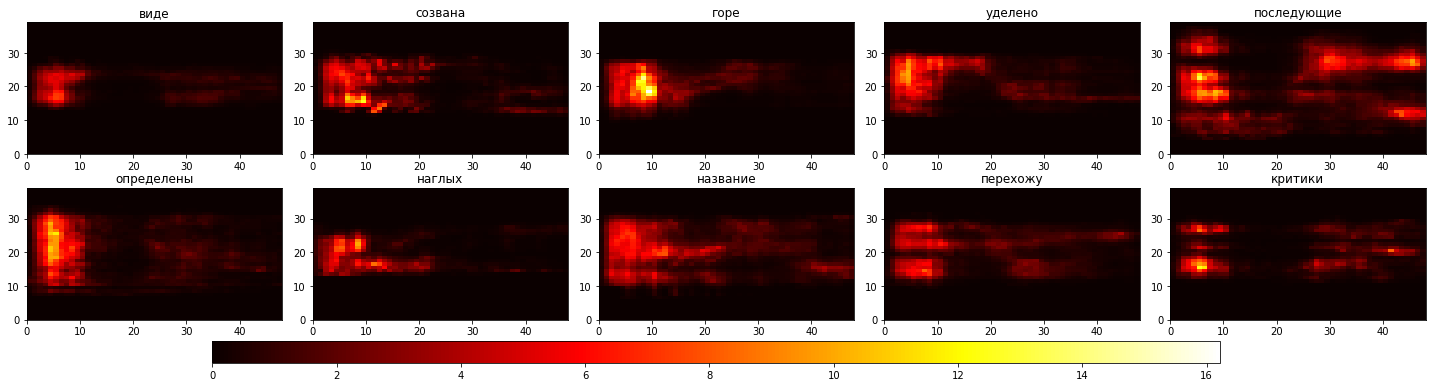

In [52]:
columns = 5
rows = len(tensors) // columns
reshaped = [list() for _ in range(rows)]
for i, tensor in enumerate(tensors):
    reshaped[i // columns].append(tensor)
    
mn = 0
mx = -1
for tensor in tensors:
    mn = min(mn, tensor.min())
    mx = max(mx, tensor.max())    

fig, axes = plt.subplots(rows, columns, figsize=(20, 3 * rows))
i = 0
for tensor_array, axes_array in zip(reshaped, axes):
    for tensor, ax in zip(tensor_array, axes_array):
        heatmap_spectrogram(ax, tensor.detach().cpu(), mn, mx, labels[i])
        i += 1
        
fig.tight_layout() 
fig.subplots_adjust(bottom=0.25)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.05])
# mapping = fig.axes([0.8, 0.05, 0.075, 0.8])
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=mn, vmax=mx),cmap='hot'), cax=cbar_ax, orientation='horizontal')
fig.show()

In [48]:
input_tensor = np.random.choice([tensors)
print(input_tensor)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
mn = 0
mx = -1
for list_of_tensors in list_of_lists_of_tensors:
    for tensor in tensors:
        mn = min(mn, tensor.min())
        mx = max(mx, tensor.max())


fig, axes = plt.subplots(len(tensors), len(list_of_tensors), figsize=(20, 10))
axes_ = [[axes[i][j] for j in range(len(tensors[0]))] for i in range(len(list_of_lists_of_tensors)) ]
for list_of_tensors, axes in zip(list_of_lists_of_tensors, axes_):
    for tensor_name, ax in zip(list_of_tensors, axes):
        tensor = torch.pow(torch.load(tensor_name).cpu(), 1)
        heatmap_spectrogram(ax, tensor, mn, mx, tensor_name)
        
fig.tight_layout() 
fig.subplots_adjust(bottom=0.25)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.05])
# mapping = fig.axes([0.8, 0.05, 0.075, 0.8])
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=mn, vmax=mx),cmap='hot'), cax=cbar_ax, orientation='horizontal')
fig.show()